<a href="https://colab.research.google.com/github/GopikrishnanL/Final-Project-DS/blob/main/Final_Project_DS_Batch_MDT31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - Customer conversion prediction - Insurance

##Problem Statement

In the insurance industry,acquiring new customers and converting leads into sales is crucial for business growth. The dataset provided contains information about a series
 of marketing calls made to potential customers by an insurance company. The goal is
 to predict whether a customer will subscribe to an insurance policy based on various
 attributes of thecustomer and details of the marketing interactions.

## Loading the dataset from the given URL

In [ ]:
import requests

url = "https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/main/insurance_dataset.csv"
response = requests.get(url)

output_path = '/content/insurance_dataset.csv'
with open(output_path, 'wb') as file:
    file.write(response.content)

output_path

'/content/insurance_dataset.csv'

In [ ]:
import pandas as pd
df=pd.read_csv(url)

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome Outcome  
0          1      unknown      no  
1          1      unknown      no  
2          1      unknown      no  
3          1      unknown      no  
4          1      unknown      no

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Outcome'],
      dtype='object')

# 1.Data Preprocessing
### Clean the data, handle missing values, Scale or Normalize Features(if needed), and encode categorical variables.

##1a.Identifing missing values

In [ ]:
import pandas as pd
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
Outcome           0
dtype: int64


In [ ]:
(df.isnull().sum()/(len(df)))*100

age               0.0
job               0.0
marital           0.0
education_qual    0.0
call_type         0.0
day               0.0
mon               0.0
dur               0.0
num_calls         0.0
prev_outcome      0.0
Outcome           0.0
dtype: float64

## 1b.Identifying duplicate values and dropping

In [ ]:
duplicates = df.duplicated().sum()
print("No of duplicate rows:", duplicates)

No of duplicate rows: 6


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape #after dropping

(45205, 11)

## 1c.Identifying the unique values

In [ ]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
Outcome              2
dtype: int64

In [ ]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education_qual: ['tertiary' 'secondary' 'unknown' 'primary']
call_type: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur: [ 261  151   76 ... 1298 1246 1556]
num_calls: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome: ['unknown' 'failure' 'other' 'success']
Outcome: ['no' 'yes']


## 1d. Identifying categorical and numarical columns

In [ ]:
# Separate categorical columns
categorical_df = df.select_dtypes(include=['object', 'category'])

# Display the categorical columns
print("\nCategorical Columns:")
print(categorical_df.head())


Categorical Columns:
            job  marital education_qual call_type  mon prev_outcome Outcome
0    management  married       tertiary   unknown  may      unknown      no
1    technician   single      secondary   unknown  may      unknown      no
2  entrepreneur  married      secondary   unknown  may      unknown      no
3   blue-collar  married        unknown   unknown  may      unknown      no
4       unknown   single        unknown   unknown  may      unknown      no


In [ ]:
# Separate numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Display the numerical columns
print("\nNumerical Columns:")
print(numerical_df.head())


Numerical Columns:
   age  day  dur  num_calls
0   58    5  261          1
1   44    5  151          1
2   33    5   76          1
3   47    5   92          1
4   33    5  198          1


# 2.Exploratory Data Analysis (EDA)
### Understand the distribution of features, identify patterns, and explore relationships between features and the target variable.

##2a.Summary statistics

In [ ]:
# Display summary statistics
df.describe().T

count        mean         std   min    25%    50%    75%     max
age        45205.0   40.937087   10.619130  18.0   33.0   39.0   48.0    95.0
day        45205.0   15.806880    8.322340   1.0    8.0   16.0   21.0    31.0
dur        45205.0  258.183055  257.538504   0.0  103.0  180.0  319.0  4918.0
num_calls  45205.0    2.763898    3.098189   1.0    1.0    2.0    3.0    63.0

##2b.Log Transformation

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv(url)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Apply log transformation to all numerical columns
# Add a small constant to avoid log(0) issues
for col in numerical_columns:
    data[f'log_{col}'] = np.log(data[col] + 1)

# Display the first few rows to check the transformations
print(df.head())


   age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome Outcome  
0          1      unknown      no  
1          1      unknown      no  
2          1      unknown      no  
3          1      unknown      no  
4          1      unknown      no  


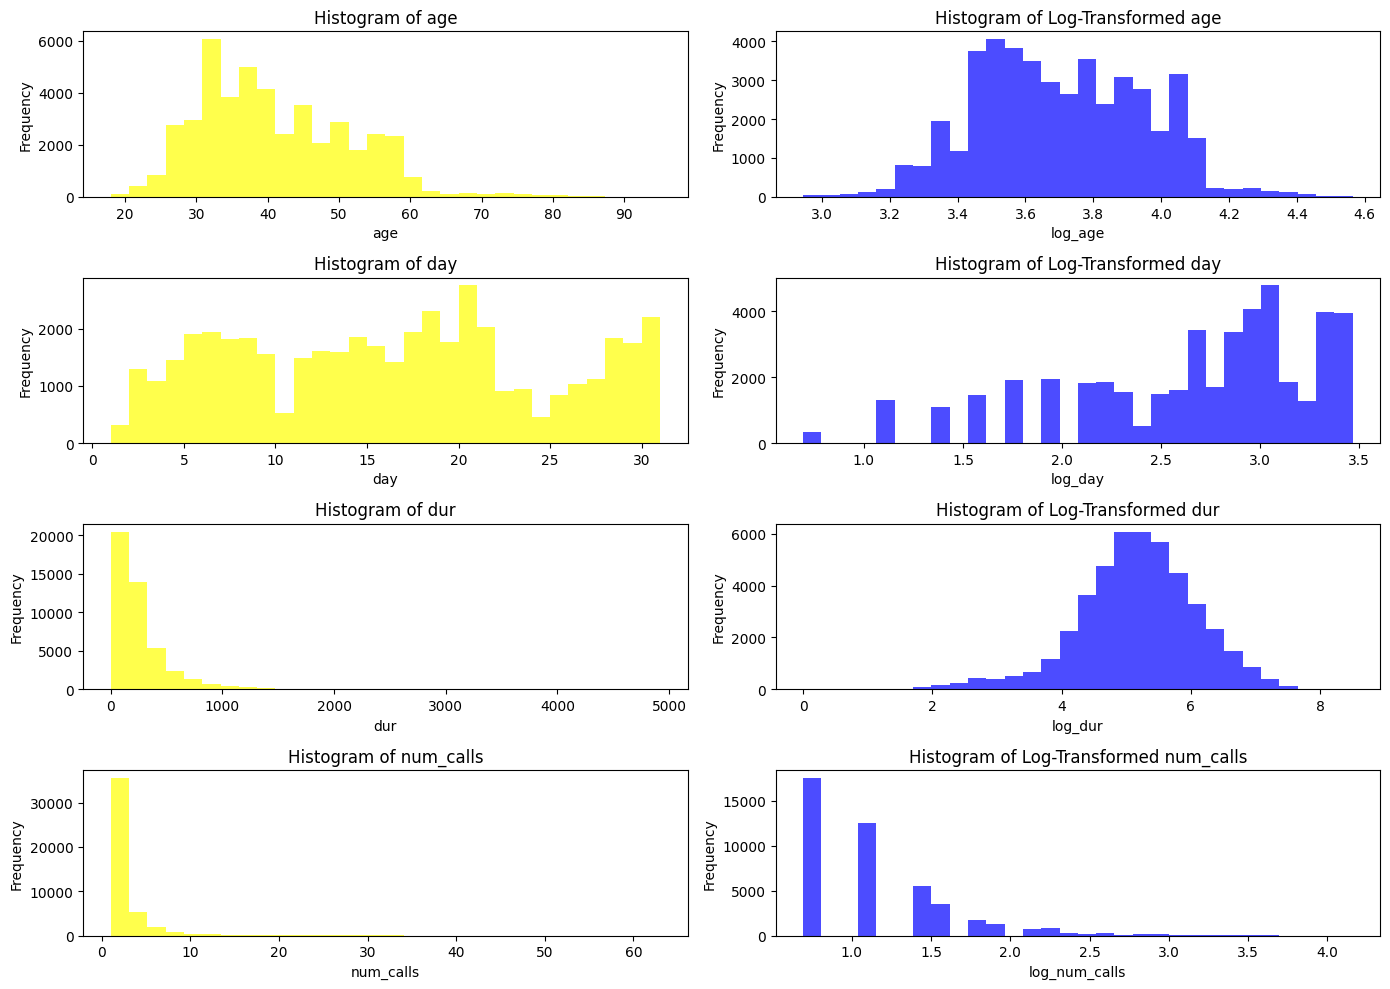

In [ ]:
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(14, 10))

# Plot histograms for original and log-transformed numerical columns
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, 2*i - 1)
    plt.hist(data[col], bins=30, color='yellow', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_columns), 2, 2*i)
    plt.hist(data[f'log_{col}'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of Log-Transformed {col}')
    plt.xlabel(f'log_{col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##2c.Uni-Variant Analysis

###(i) Age vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100']

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot to show the count of each Outcome per age group with custom colors
fig = px.histogram(df, x='age_group', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per Age Group',
                   category_orders={'age_group': labels})

fig.update_layout(bargap=0.2)
fig.show()


###(ii) Job vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='job', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per Job Type')

fig.update_layout(bargap=0.2)
fig.show()


###(iii) Marital vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='marital', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per marital Type')

fig.update_layout(bargap=0.5)
fig.show()


###(iv) Educational qual vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='education_qual', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per education_qual Type')

fig.update_layout(bargap=0.5)
fig.show()


###(v) Call type vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='call_type', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per call_type Type')

fig.update_layout(bargap=0.5)
fig.show()

###(vi) Prev outcome vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='prev_outcome', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per prev_outcome Type')

fig.update_layout(bargap=0.5)
fig.show()

###(vii) Call duration vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define bins for duration and create labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 120 , 300 , 1000 , 10000 , 50000 ]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-120' , '121-300' , '301-1000' , '1001-10000' , '10001-50000'   ]

# Create duration bins
df['duration_group'] = pd.cut(df['dur'], bins=bins, labels=labels, right=False)

# Create a pie chart showing the distribution of duration groups
fig = px.pie(df, names='duration_group', title='Distribution of Call Durations')

fig.show()


###(viii) Day vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='day', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per day Type')

fig.update_layout(bargap=0.5)
fig.show()

###(ix) Month vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define color mapping for Outcome
color_map = {
    'yes': 'blue',
    'no': 'yellow'
}

# Create a bar plot
fig = px.histogram(df, x='mon', color='Outcome',
                   color_discrete_map=color_map,
                   title='Outcome Count per mon Type')

fig.update_layout(bargap=0.5)
fig.show()

###(x) No of calls vs Outcome

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(url)

# Define bins for duration and create labels
bins = [0, 6, 10, 20, 40 , 120 , ]
labels = ['0-2', '3-6', '7-10', '11-20', '21-40', ]

# Create duration bins
df['num_calls_group'] = pd.cut(df['num_calls'], bins=bins, labels=labels, right=False)

# Create a pie chart showing the distribution of duration groups
fig = px.pie(df, names='num_calls_group', title='Distribution of number of calls')

fig.show()

## 2d.Multi-Variant Analysis

### (i)Box Plot - Outlier

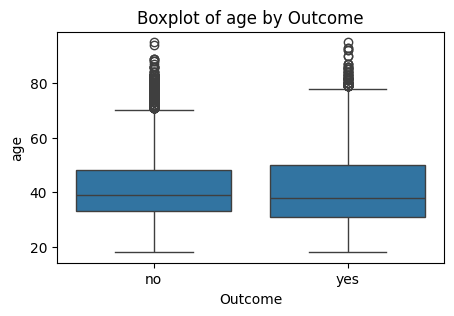

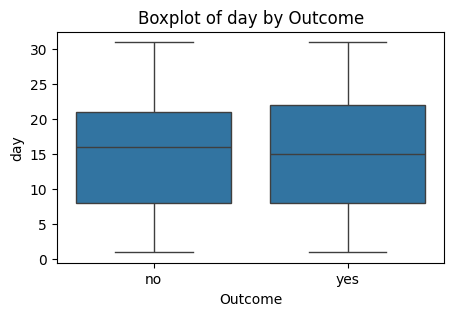

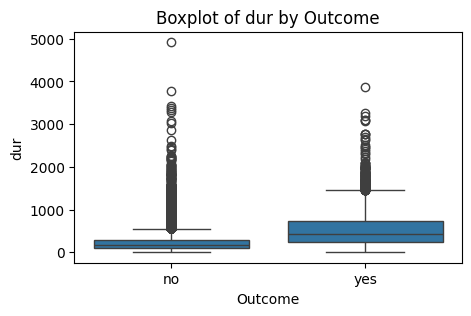

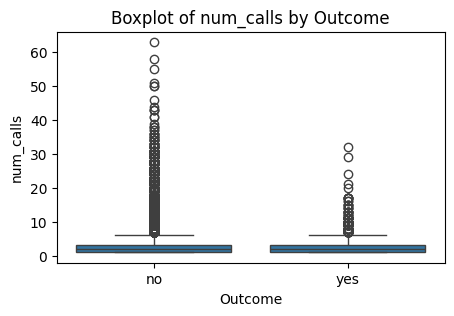

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['age',  'day', 'dur', 'num_calls']

# Plot box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Outcome')
    plt.show()


###(ii)Pair Plot

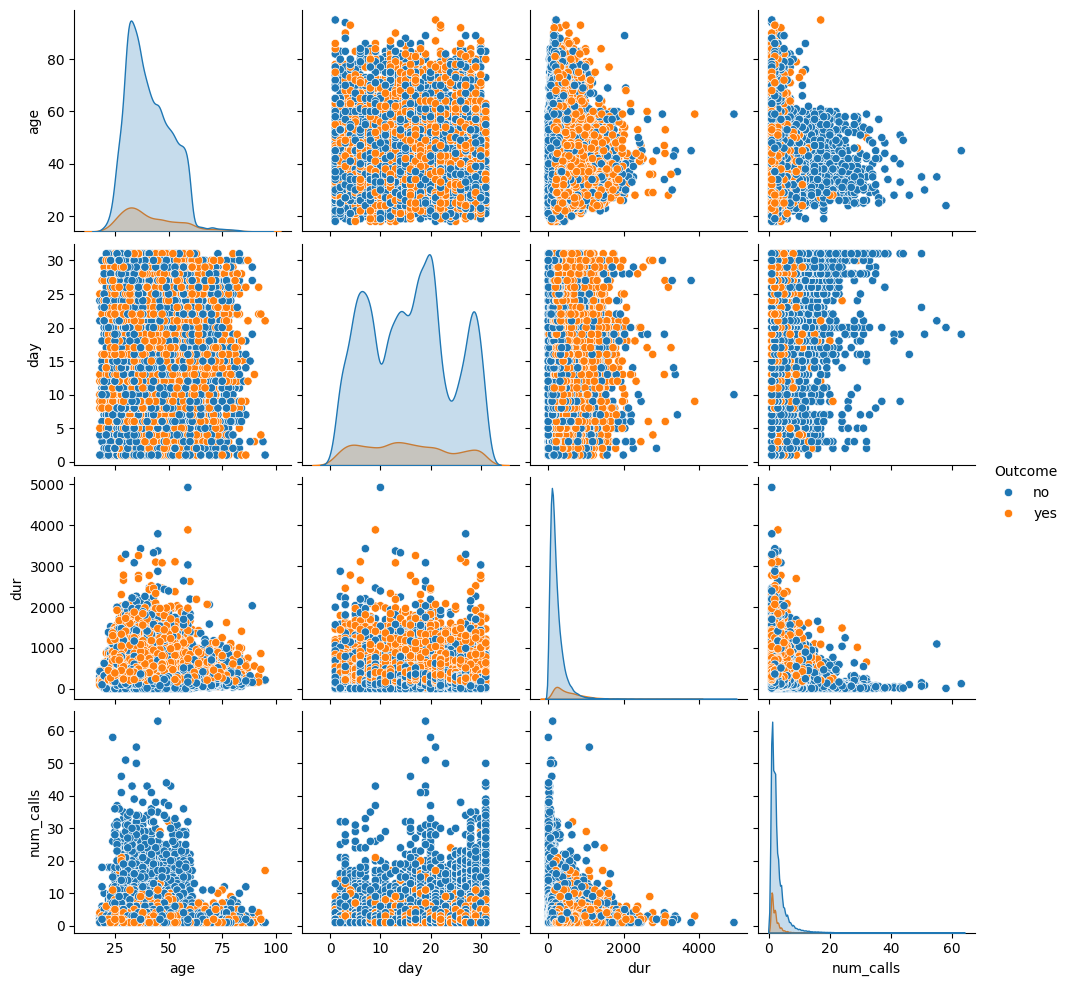

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame and Outcome is the target column
sns.pairplot(df, hue='Outcome', vars=['age', 'day', 'dur', 'num_calls'])
plt.show()

###(iii)Correlation

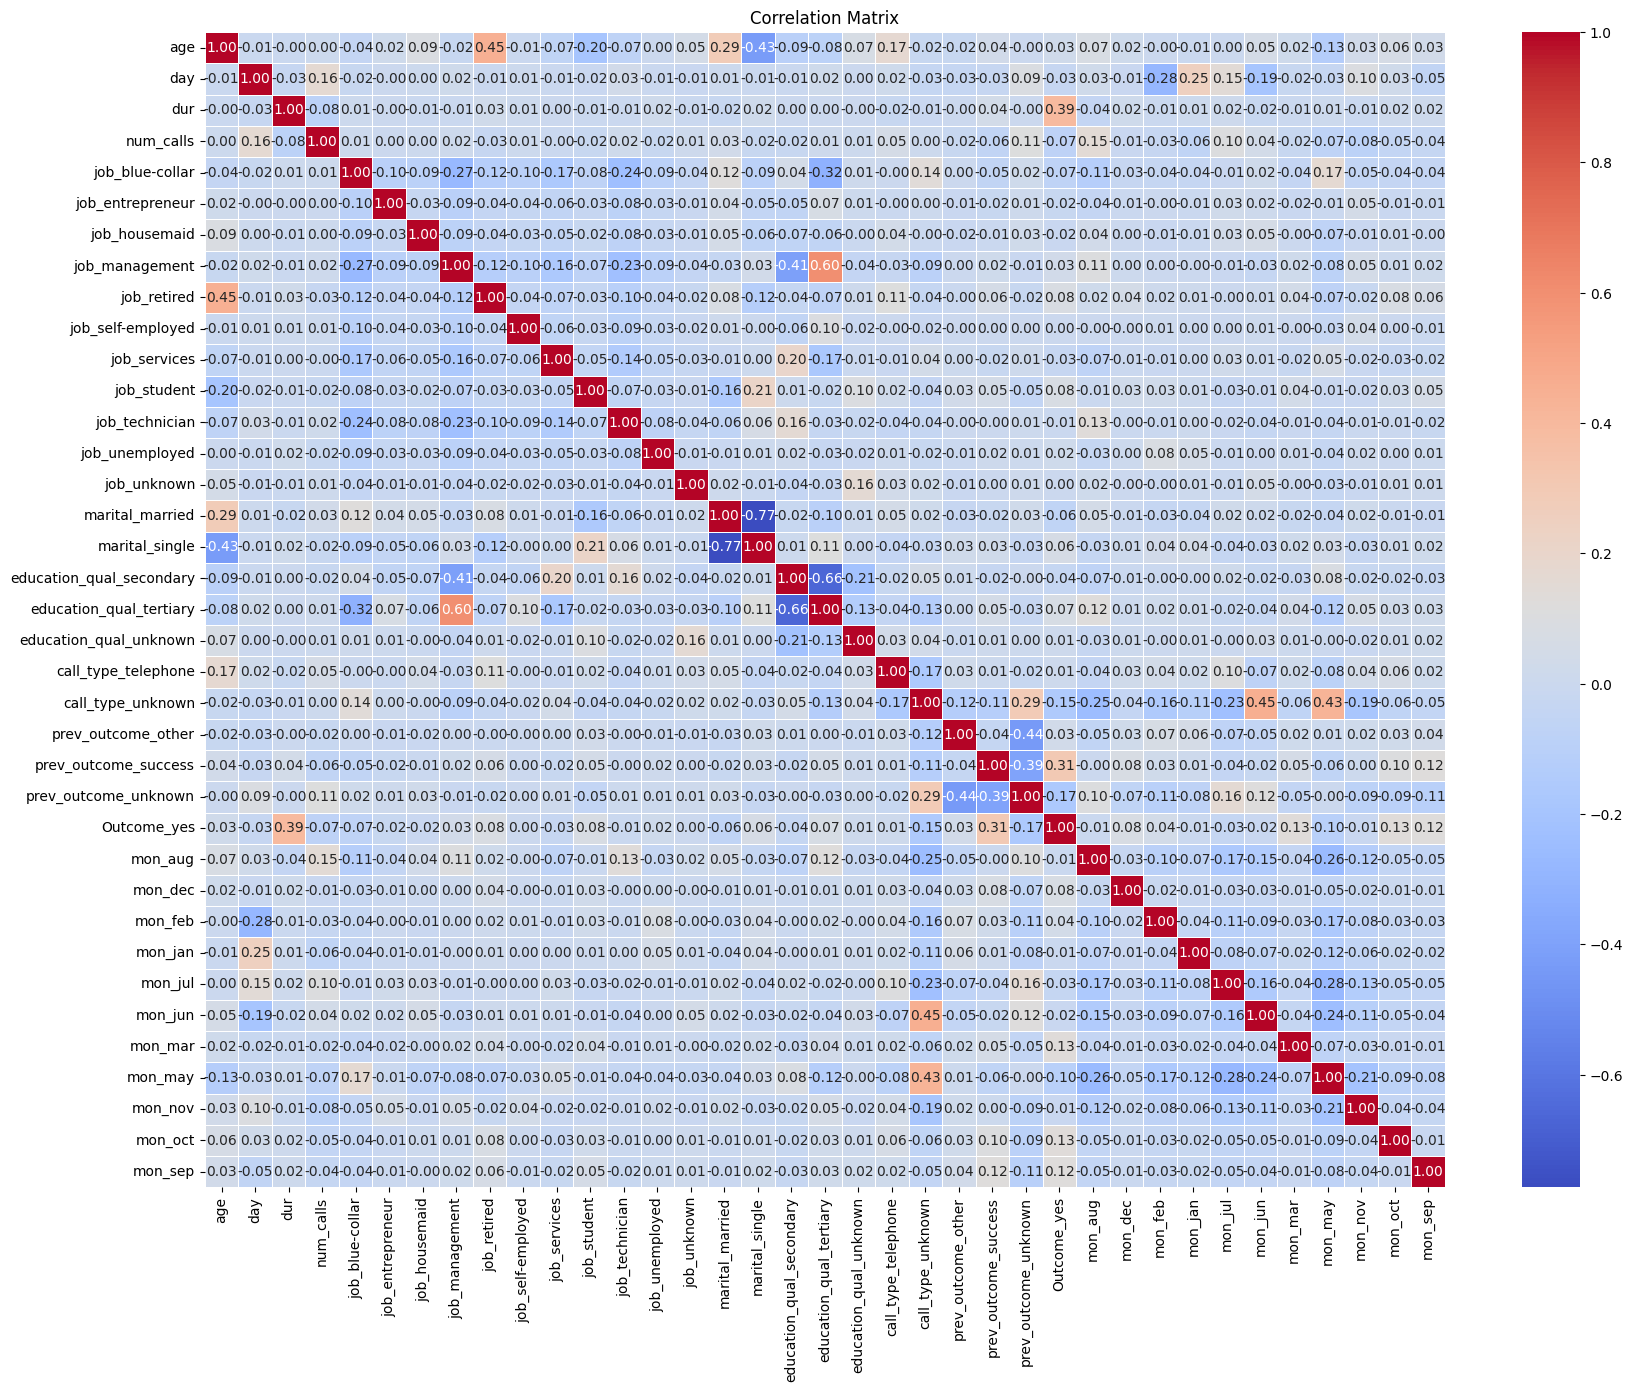

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from URL

df = pd.read_csv(url)

# Encode categorical variables using one-hot encoding
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome', 'Outcome', 'mon']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###(iv)Categorical features - Count Plot

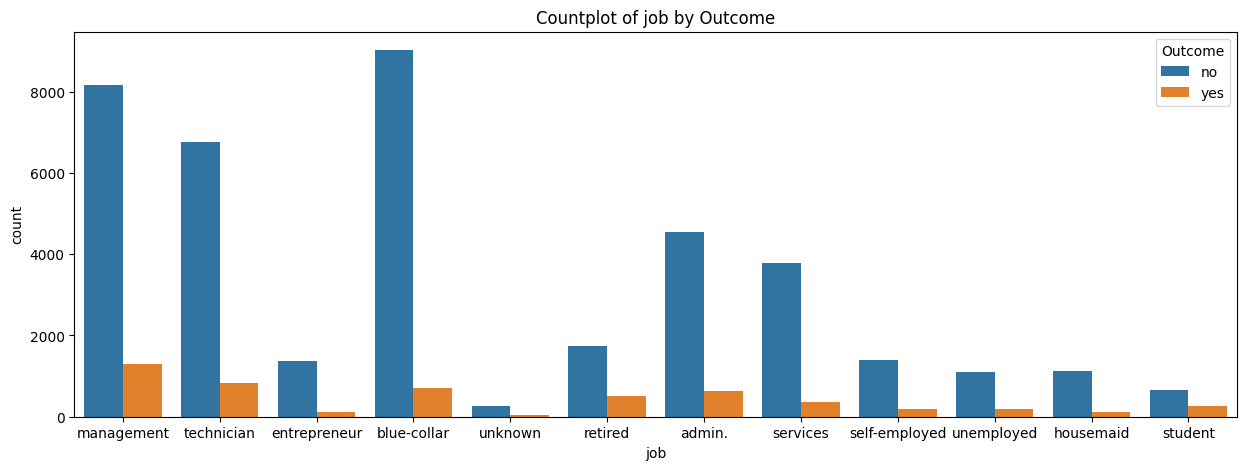

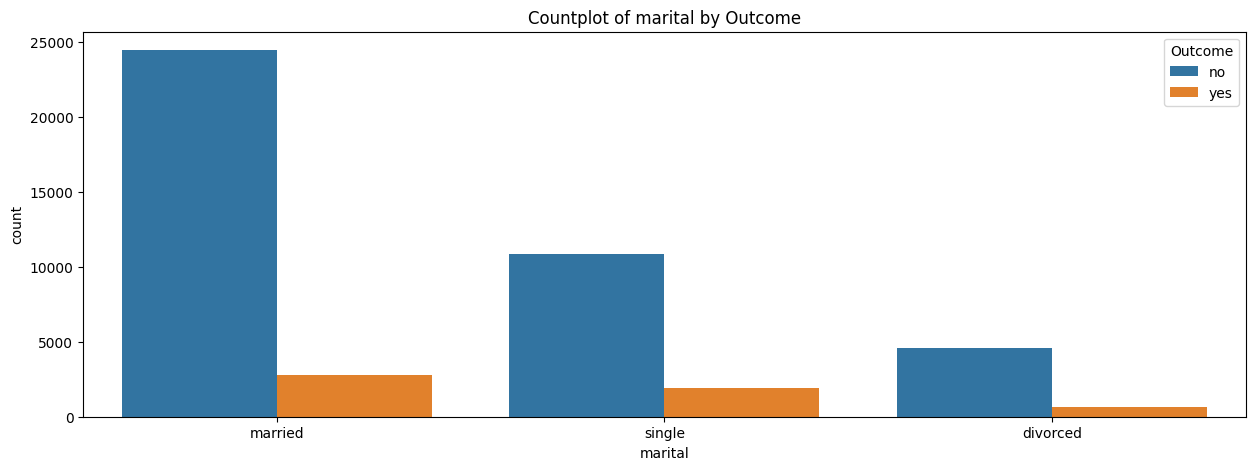

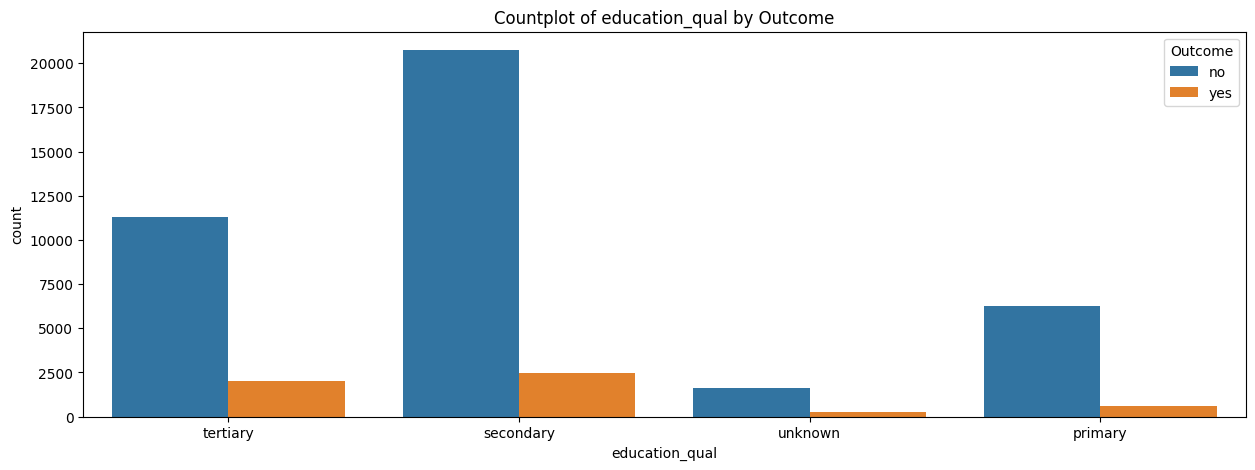

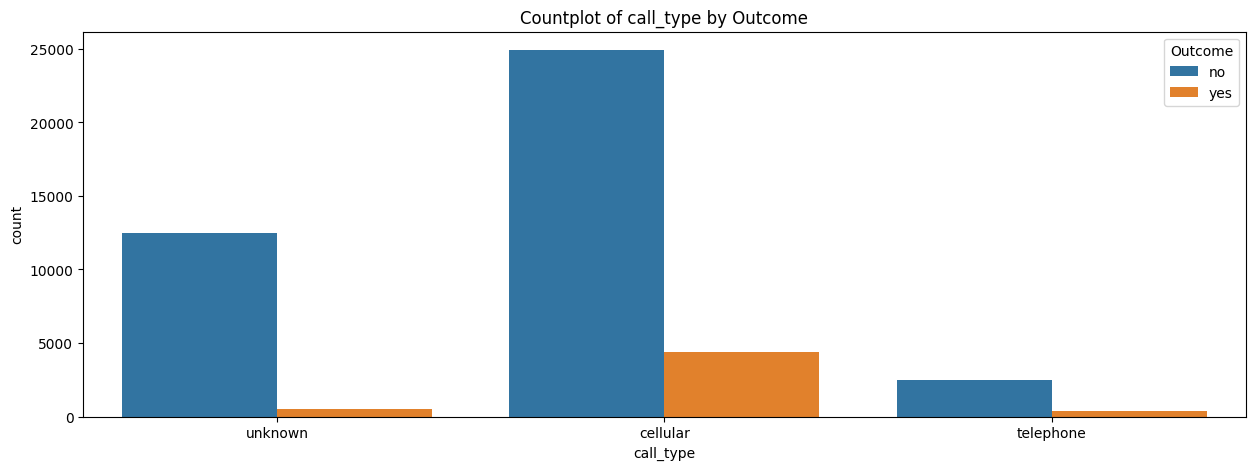

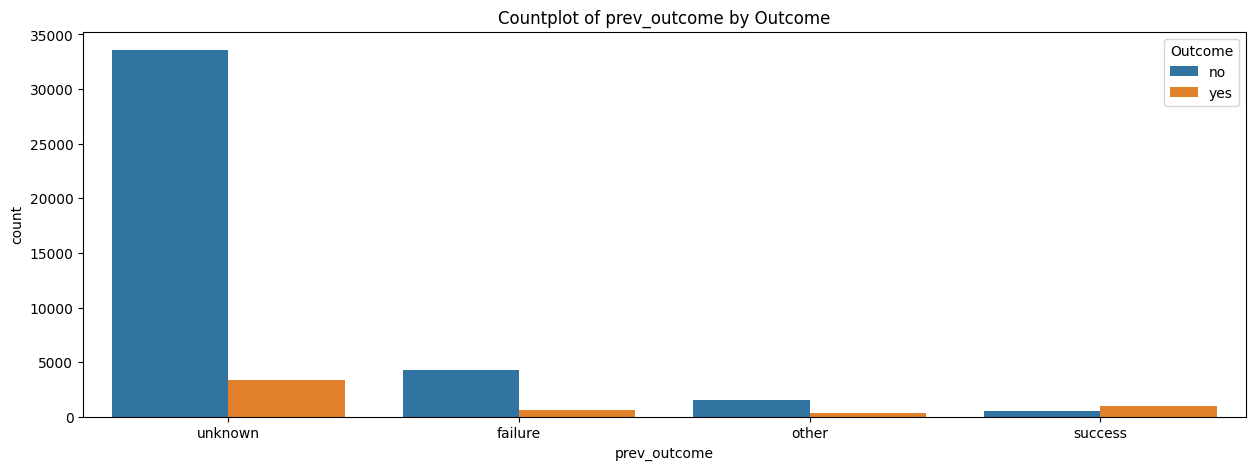

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome']

# Plot count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=feature, hue='Outcome', data=df)
    plt.title(f'Countplot of {feature} by Outcome')
    plt.show()


# 3.Dataset Balancing
### Is the target feature balanced or not. The imbalance of the target variable requires a careful consideration in the prediction stage in this project.

##3a.Categorical Feature Encoding

In [ ]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education_qual','call_type', 'day', 'mon', 'prev_outcome'])


##3b.Target Variable Encoding

In [ ]:
df_encoded['Outcome'] = df_encoded['Outcome'].map({'yes': 1, 'no': 0})
print(df_encoded[['Outcome']].head())

   Outcome
0        0
1        0
2        0
3        0
4        0


##3c.Normalizing Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[['age', 'dur', 'num_calls']] = scaler.fit_transform(df_encoded[['age', 'dur', 'num_calls']])

##3d.Data Scaling

In [ ]:
print(df_encoded[['age', 'dur', 'num_calls']].describe())

                age           dur     num_calls
count  45211.000000  45211.000000  45211.000000
mean       0.297873      0.052494      0.028449
std        0.137906      0.052364      0.049968
min        0.000000      0.000000      0.000000
25%        0.194805      0.020943      0.000000
50%        0.272727      0.036600      0.016129
75%        0.389610      0.064864      0.032258
max        1.000000      1.000000      1.000000


In [ ]:
df_encoded.head()

age       dur  num_calls  Outcome  job_admin.  job_blue-collar  \
0  0.519481  0.053070        0.0        0       False            False   
1  0.337662  0.030704        0.0        0       False            False   
2  0.194805  0.015453        0.0        0       False            False   
3  0.376623  0.018707        0.0        0       False             True   
4  0.194805  0.040260        0.0        0       False            False   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  mon_jun  \
0             False          False            True        False  ...    False   
1             False          False           False        False  ...    False   
2              True          False           False        False  ...    False   
3             False          False           False        False  ...    False   
4             False          False           False        False  ...    False   

   mon_mar  mon_may  mon_nov  mon_oct  mon_sep  prev_outcome_failure  \
0    False     True    False    False    False                 False   
1    False     True    False    False    False                 False   
2    False     True    False    False    False                 False   
3    False     True    False    False    False                 False   
4    False     True    False    False    False                 False   

   prev_outcome_other  prev_outcome_success  prev_outcome_unknown  
0               False                 False                  True  
1               False                 False                  True  
2               False                 False                  True  
3               False                 False                  True  
4               False                 False                  True  

[5 rows x 73 columns]

##3e.Verifying and Visualizing Class Distribution

In [ ]:
# Count the number of instances for each class in the target feature
class_distribution = df_encoded['Outcome'].value_counts()
print(class_distribution)

Outcome
0    39922
1     5289
Name: count, dtype: int64


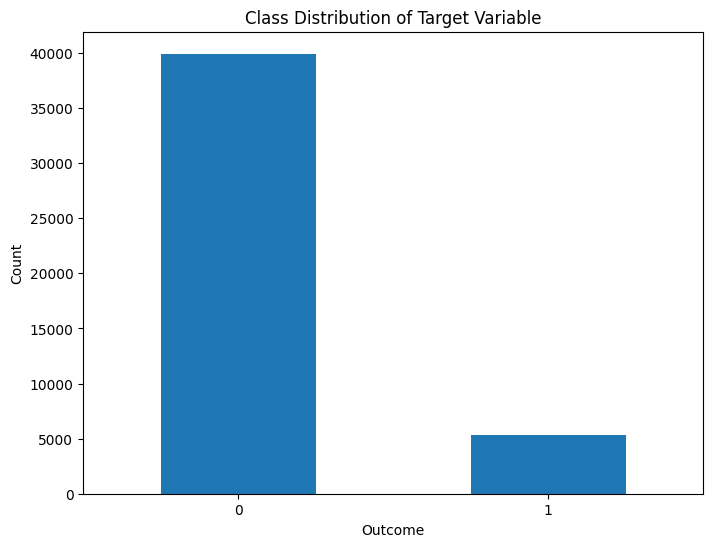

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
df_encoded['Outcome'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##3f.Determining the provided dataset is balanced or Imbalanced
###Balanced Data: Classes are approximately equal in number.
###Imbalanced Data: Significant disparity between the number of instances in each class.

###(i)Identifying the target variable is having imbalanced data structure.
###Oversampling: Increase the number of instances in the minority class.
###Using SMOTE (Synthetic Minority Over-sampling Technique).

In [ ]:
df_encoded.shape

(45211, 73)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the data into features (X) and target (y)
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the class distribution before applying SMOTE
print(f"Original class distribution: {Counter(y_train)}")

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after applying SMOTE
print(f"Resampled class distribution: {Counter(y_resampled)}")



Original class distribution: Counter({0: 27956, 1: 3691})
Resampled class distribution: Counter({0: 27956, 1: 27956})


In [ ]:
print ("actual data frame is" , (df_encoded.shape))
print ("balanced feature "    , (X_resampled.shape))
print ("balanced target "     , (y_resampled.shape))

actual data frame is (45211, 73)
balanced feature  (55912, 72)
balanced target  (55912,)


###(ii)Resampling Target Variables

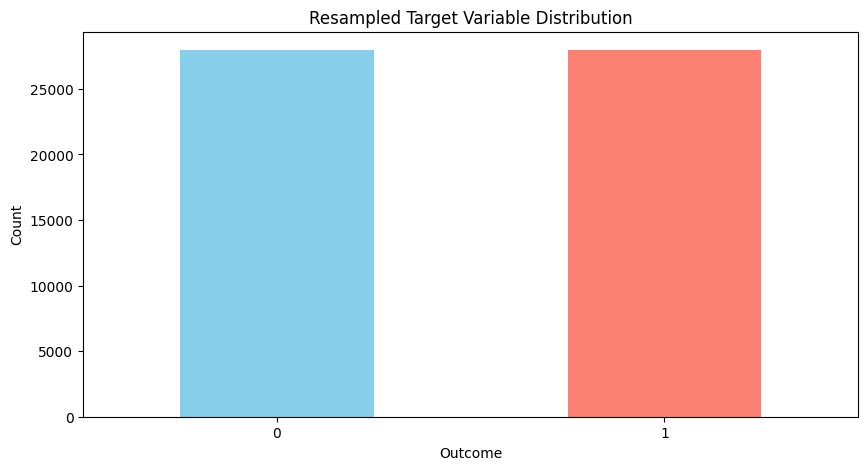

In [ ]:
# Plot the distribution of the target variable after resampling

plt.figure(figsize=(10, 5))
pd.Series(y_resampled).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Resampled Target Variable Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#4.Model Building
###Train various machine learning models to predict the target variable and segment customers.

##4a.Combining resampled data frame

In [ ]:
import pandas as pd

# If X_resampled is not a DataFrame, convert it first
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled)

# Assuming y_resampled is a Series
if not isinstance(y_resampled, pd.Series):
    y_resampled = pd.Series(y_resampled)

# Create a new DataFrame by combining X_resampled and y_resampled
df_new = pd.concat([X_resampled, y_resampled.reset_index(drop=True)], axis=1)

# Optionally, name the new column for y_resampled
df_new.columns = list(X_resampled.columns) + ['target']

print(df_new.head())


        age       dur  num_calls  job_admin.  job_blue-collar  \
0  0.233766  0.031110   0.048387       False            False   
1  0.493506  0.063440   0.032258       False            False   
2  0.363636  0.016877   0.016129       False             True   
3  0.298701  0.061407   0.000000       False            False   
4  0.259740  0.018300   0.000000       False             True   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0             False          False           False        False   
1              True          False           False        False   
2             False          False           False        False   
3             False          False            True        False   
4             False          False           False        False   

   job_self-employed  ...  mon_mar  mon_may  mon_nov  mon_oct  mon_sep  \
0              False  ...    False    False    False    False    False   
1              False  ...    False    False     True    Fa

In [ ]:
df_new.columns

Index(['age', 'dur', 'num_calls', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_30', 'day_31', 'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb',
       'mon_jan', 'mon_jul', 'mon_jun', 'mon_mar', 'mon_may', 'mon_nov',
       'mon_oct', 'mon_sep', 'prev_

In [ ]:
df_new.shape

(55912, 73)

##4b.Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

##4c.Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X_scaled , y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(39138, 72)

##4d.Training and Evaluating Classification Model

###(i)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9288184094431858
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8406
           1       0.96      0.90      0.93      8368

    accuracy                           0.93     16774
   macro avg       0.93      0.93      0.93     16774
weighted avg       0.93      0.93      0.93     16774



###(ii)Decision Tree Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9096816501728866
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8406
           1       0.90      0.92      0.91      8368

    accuracy                           0.91     16774
   macro avg       0.91      0.91      0.91     16774
weighted avg       0.91      0.91      0.91     16774



###(iii)Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9522475259329916
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8406
           1       0.93      0.98      0.95      8368

    accuracy                           0.95     16774
   macro avg       0.95      0.95      0.95     16774
weighted avg       0.95      0.95      0.95     16774



###(iv)GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.9020507928937641
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      8406
           1       0.89      0.92      0.90      8368

    accuracy                           0.90     16774
   macro avg       0.90      0.90      0.90     16774
weighted avg       0.90      0.90      0.90     16774



###(v)Support Vector Machine (SVC)

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.9407416239418147
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8406
           1       0.95      0.93      0.94      8368

    accuracy                           0.94     16774
   macro avg       0.94      0.94      0.94     16774
weighted avg       0.94      0.94      0.94     16774



###(vi)Gaussian Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.7397758435674258
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      8406
           1       0.81      0.62      0.70      8368

    accuracy                           0.74     16774
   macro avg       0.75      0.74      0.74     16774
weighted avg       0.75      0.74      0.74     16774



###(vii)K-Nearest Neighbors (KNN Classifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9143317038273518
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8406
           1       0.92      0.90      0.91      8368

    accuracy                           0.91     16774
   macro avg       0.91      0.91      0.91     16774
weighted avg       0.91      0.91      0.91     16774



##4e.Clustering for Customer Segmentation

###(i)KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10 , random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df_new['cluster'] = clusters

##4f.Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming RandomForestClassifier was one of the models you trained
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)


Best Model: RandomForestClassifier(n_estimators=200, random_state=42)


#5.Model Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Assuming X_resampled and y_resampled are your features and target variable respectively
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

# Dictionary to store models and their names
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Enable probability for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("\n" + "="*60 + "\n")

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)


Logistic Regression Evaluation:
Accuracy: 0.9288
Precision: 0.9307
Recall: 0.9288
F1-Score: 0.9287
ROC-AUC: 0.9817


Decision Tree Evaluation:
Accuracy: 0.9100
Precision: 0.9101
Recall: 0.9100
F1-Score: 0.9100
ROC-AUC: 0.9101


Random Forest Evaluation:
Accuracy: 0.9512
Precision: 0.9523
Recall: 0.9512
F1-Score: 0.9511
ROC-AUC: 0.9920


Gradient Boosting Evaluation:
Accuracy: 0.9021
Precision: 0.9025
Recall: 0.9021
F1-Score: 0.9020
ROC-AUC: 0.9678


Support Vector Machine Evaluation:
Accuracy: 0.9407
Precision: 0.9411
Recall: 0.9407
F1-Score: 0.9407
ROC-AUC: 0.9862


Naive Bayes Evaluation:
Accuracy: 0.7398
Precision: 0.7539
Recall: 0.7398
F1-Score: 0.7360
ROC-AUC: 0.8403


K-Nearest Neighbors Evaluation:
Accuracy: 0.9143
Precision: 0.9145
Recall: 0.9143
F1-Score: 0.9143
ROC-AUC: 0.9650




#6.Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_resampled.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
1                    dur    0.340922
2              num_calls    0.102072
0                    age    0.071863
70  prev_outcome_success    0.049298
22    call_type_cellular    0.028523
..                   ...         ...
5       job_entrepreneur    0.002653
6          job_housemaid    0.002273
48                day_24    0.001847
55                day_31    0.001469
14           job_unknown    0.000832

[72 rows x 2 columns]


#7.Dump Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

#8.Results

##8a.Exploring skewness and outliers in the dataset.

     Feature  Skewness
0        age  0.884594
1        dur  1.964011
2  num_calls  5.689540
3     target  0.000000
4    cluster -0.126400


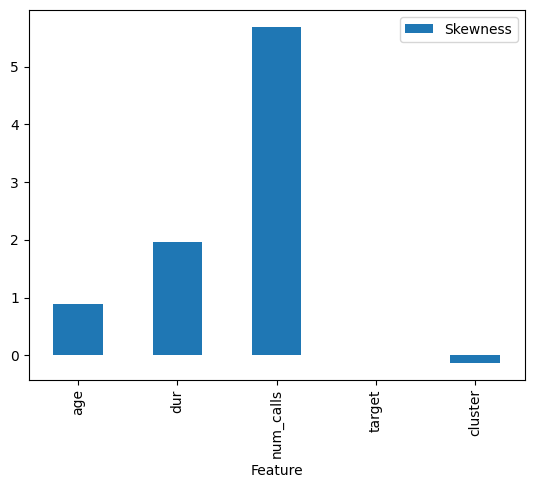

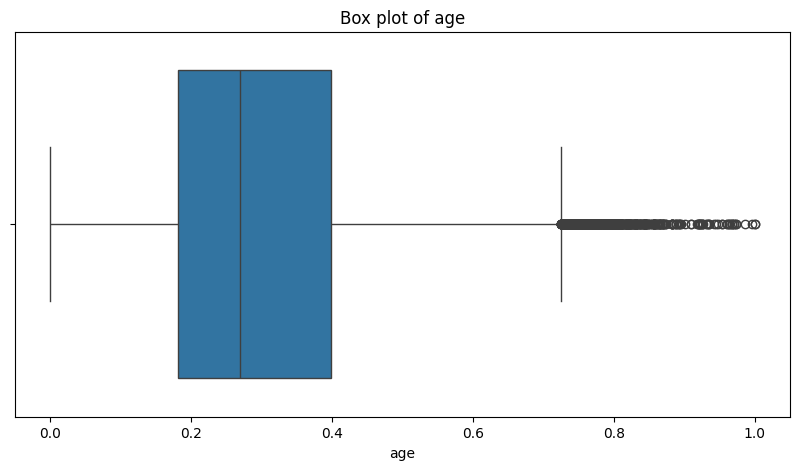

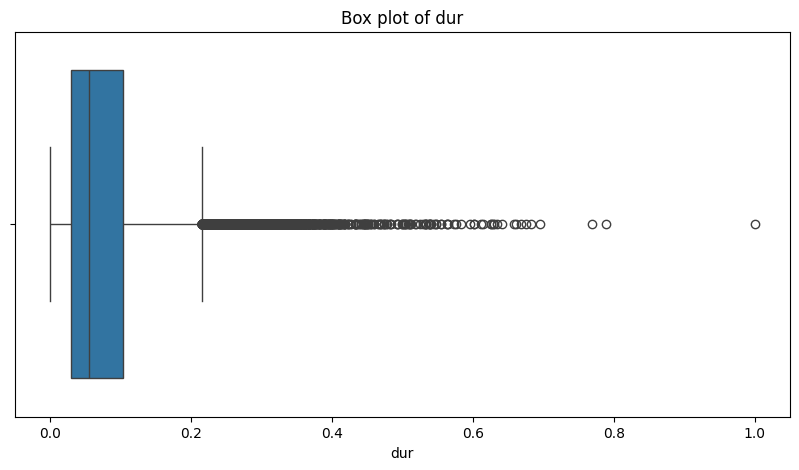

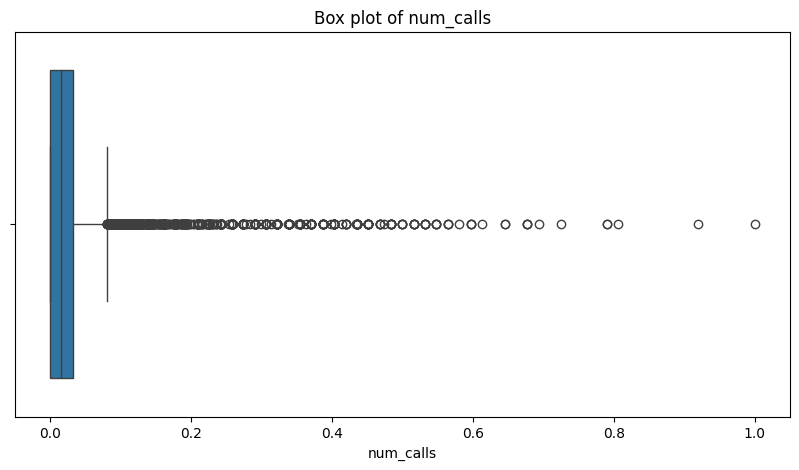

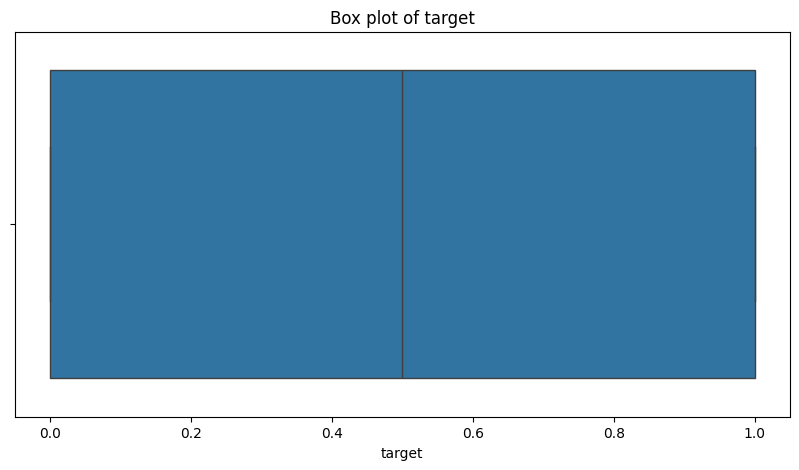

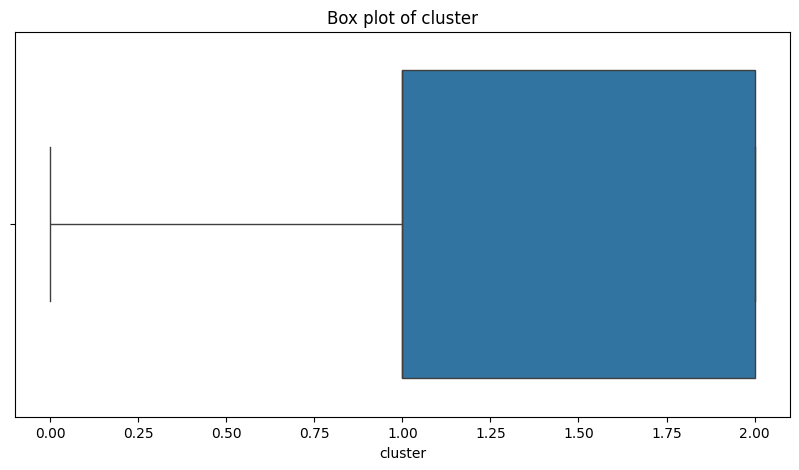

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load your dataset
data = df_new

# Check for skewness
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
skewness = data[numerical_features].apply(lambda x: skew(x.dropna()))
skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})
print(skewness_df)

# Visualize skewness
skewness_df.plot(kind='bar', x='Feature', y='Skewness')
plt.show()

# Check for outliers using box plots
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

##8b.Transform the data into a suitable format and perform any necessary cleaning and pre-processing steps.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# One-hot encode categorical features
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Combine processed features
processed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

##8c. ML Classification model which predicts Status: YES or NO.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# Assume 'Status' is the target column
X = processed_data
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8406
         1.0       1.00      1.00      1.00      8368

    accuracy                           1.00     16774
   macro avg       1.00      1.00      1.00     16774
weighted avg       1.00      1.00      1.00     16774



##8d.ML model for Customer Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



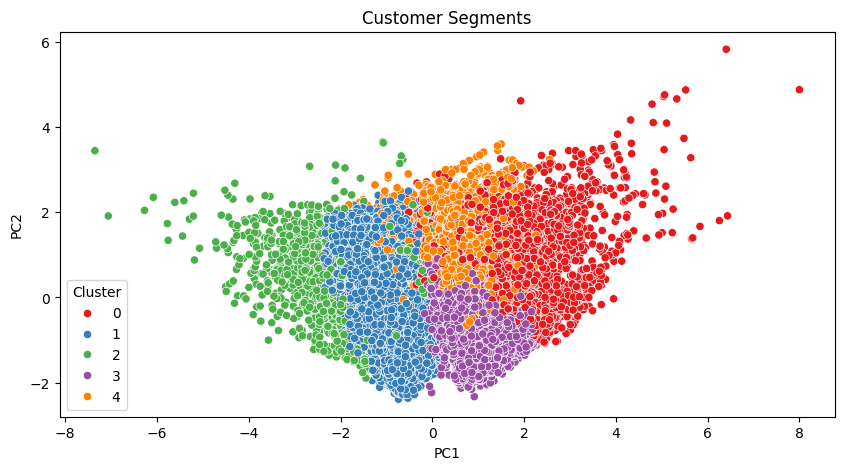

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(processed_data)

# Add cluster labels to the data
data['Cluster'] = kmeans.labels_

# Visualize the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Customer Segments')
plt.show()

#9.Model Deployment

##9a.Model Verification

In [ ]:
#Importing saved model
import pickle

# Load the trained model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

##9b. New Data for Prediction

In [ ]:
# Sample new data for prediction
new_data_dict = [
    {'age': 35, 'job': 'blue-collar', 'marital': 'single', 'education_qual': 'secondary',
     'call_type': 'telephone', 'day': 5 , 'mon': 'nov', 'dur': 15.0 , 'num_calls': 3,
     'prev_outcome': 'failure'}
]

##9c.OneHotEncoder, StandardScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data_dict)

# Define your feature transformers (These should be the same ones used for training)
categorical_features = ['job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'prev_outcome']
numerical_features = ['age', 'dur', 'num_calls']

# Encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(new_data_df[categorical_features])

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(new_data_df[numerical_features])

# Combine encoded and scaled features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)
preprocessed_data = pd.concat([encoded_df, scaled_df], axis=1)

#  DataFrame has the same columns as used in training
all_columns = ['age', 'dur', 'num_calls', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_30', 'day_31', 'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb',
       'mon_jan', 'mon_jul', 'mon_jun', 'mon_mar', 'mon_may', 'mon_nov',
       'mon_oct', 'mon_sep', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']

preprocessed_data = preprocessed_data.reindex(columns=all_columns, fill_value=0)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



##9d.Prediction Status : Customer conversion

In [ ]:
import numpy as np

# Convert to NumPy array
new_data_array = preprocessed_data.to_numpy()

# Make predictions
predictions = model.predict(new_data_array)

# Convert numeric predictions to labels
prediction_labels = ['no', 'yes']
predicted_labels = [prediction_labels[int(pred)] for pred in predictions]

print('Predictions: The customer will convert ', predicted_labels)


Predictions: The customer will convert  ['yes']
